In [1]:
s3_data ="s3://aegovan-data/processed_dataset/test_unique_pub_v6_max_neg.json"
data_dir = "temp"

s3_model_single_path = "s3://aegovan-data/results/ppi-bert-2020-12-13-06-28-21-445/output/output.tar.gz"
s3_model_path_format = "s3://aegovan-data/results/{}/output/output.tar.gz"

In [2]:
!pip install scikit-plot==0.3.7


You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
!rm -rf $data_dir
!mkdir $data_dir
!aws s3 cp  $s3_model_single_path $data_dir

download: s3://aegovan-data/results/ppi-bert-2020-12-13-06-28-21-445/output/output.tar.gz to temp/output.tar.gz


In [4]:
!tar -xf $data_dir/output.tar.gz -C $data_dir


In [5]:
!rm $data_dir/output.tar.gz


In [6]:
!ls -l $data_dir

total 5232
-rw-r--r--  1 aeg  staff  2661884 Dec 13 20:35 predicted.json
-rw-r--r--  1 aeg  staff     4841 Dec 13 20:35 training_scores_epoch_Objectdump_20201213_093515_ed3109d0-dcad-4339-b315-b4c88bc829d4.json
-rw-r--r--  1 aeg  staff     4860 Dec 13 20:35 validation_scores_epoch_Objectdump_20201213_093515_8498cd12-9a88-49d6-b6b6-0d6047e525df.json


In [7]:
import tarfile
import pandas as pd
import json
from pandas.io.json import json_normalize
import tempfile 
import os
import boto3
import matplotlib.pyplot as plt
import glob
from sklearn.metrics import f1_score, accuracy_score,precision_score, recall_score
import scikitplot as skplt

In [8]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 10000)
pd.set_option('display.max_rows', 100)

In [9]:
import boto3

def download_single_file(bucket_name_path, local_path):
    index = bucket_name_path.find("://")

    # remove the s3:// if present
    if index > -1:
        bucket_name_path = bucket_name_path[index + 3:]

    key_start_index = bucket_name_path.find("/")
    bucket_name = bucket_name_path
    key = "/"
    if key_start_index > -1:
        bucket_name = bucket_name_path[0:key_start_index]
        key = bucket_name_path[key_start_index + 1:]
        
    client = boto3.resource('s3')
    client.Bucket(bucket_name).download_file(key, local_path)



In [10]:
import glob, os

single_test_results_file = os.path.join(data_dir, "predicted.json")
validation_fit_file = glob.glob("{}/validation_scores_epoch_Objectdump*.json".format(data_dir))[0]
train_fit_file = glob.glob("{}/training_scores_epoch_Objectdump*.json".format(data_dir))[0]


pos_label = True

In [11]:
#download_single_file(s3_data, test_input_file)

In [12]:
import pandas as pd

In [13]:

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 10000)
pd.set_option('display.max_rows', 100)

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

In [14]:
df_single_test_results = pd.read_json(single_test_results_file)
df_single_test_results["actual"] = df_single_test_results["class"]

In [15]:
df_single_test_results.columns


Index(['pubmedId', 'pubmedabstract', 'normalised_abstract', 'participant1Id',
       'participant2Id', 'class', 'predicted', 'confidence_scores', 'actual'],
      dtype='object')

In [16]:
df_single_test_results.shape

(894, 9)

In [17]:
df_single_test_results.head(n=2)

,pubmedId,pubmedabstract,normalised_abstract,participant1Id,participant2Id,class,predicted,confidence_scores,actual
0,16407301,"MAPK/ERK kinase kinase 3 (MEKK3) is a mitogen-activated protein kinase kinase kinase (MAP3K) that functions upstream of the MAP kinases and IkappaB kinase. Phosphorylation is believed to be a critical component for MEKK3-dependent signal transduction, but little is known about the phosphorylation sites of this MAP3K. To address this question, point mutations were introduced in the activation loop (T-loop), substituting alanine for serine or threonine, and the mutants were transfected into HEK293 Epstein-Barr virus nuclear antigen cells. MEKK3-dependent activation of an NF-kappaB reporter gene as well as ERK, JNK, and p38 MAP kinases correlated with a requirement for serine at position 526. Constitutively active mutants of MEKK3, consisting of S526D and S526E, were capable of activating a NF-kappaB luciferase reporter gene as well as ERK and MEK, suggesting that a negative charge at Ser526 was necessary for MEKK3 activity and implicating Ser526 as a phosphorylation site. An antibody was developed that specifically recognized phospho-Ser526 of MEKK3 but did not recognize the S526A point mutant. The catalytically inactive (K391M) mutant of MEKK3 was not phosphorylated at Ser526, indicating that phosphorylation of Ser526 occurs via autophosphorylation. Endogenous MEKK3 was phosphorylated on Ser526 in response to osmotic stress. In addition, phosphorylation of Ser526 was required for MKK6 phosphorylation in vitro, whereas dephosphorylation of Ser526 was mediated by protein phosphatase 2A and sensitive to okadaic acid and sodium fluoride. Finally, the association between MEKK3 and 14-3-3 was dependent on Ser526 and prevented dephosphorylation of Ser526. In summary, Ser526 of MEKK3 is an autophosphorylation site within the T-loop that is regulated by PP2A and 14-3-3 proteins.","Q99759 (Q99759) is a mitogen-activated protein kinase kinase kinase (MAP3K) that functions upstream of the MAP kinases and IkappaB kinase. Phosphorylation is believed to be a critical component for Q99759-dependent signal transduction, but little is known about the phosphorylation sites of this MAP3K. To address this question, point mutations were introduced in the activation loop (T-loop), substituting alanine for serine or threonine, and the mutants were transfected into HEK293 Epstein-Barr virus nuclear antigen cells. Q99759-dependent activation of an NF-kappaB reporter gene as well as ERK, JNK, and Q16539 MAP kinases correlated with a requirement for serine at position 526. Constitutively active mutants of Q99759, consisting of S526D and S526E, were capable of activating a NF-kappaB luciferase reporter gene as well as ERK and O14733, suggesting that a negative charge at Ser526 was necessary for Q99759 activity and implicating Ser526 as a phosphorylation site. An antibody was developed that specifically recognized phospho-Ser526 of Q99759 but did not recognize the S526A point mutant. The catalytically inactive (K391M) mutant of Q99759 was not phosphorylated at Ser526, indicating that phosphorylation of Ser526 occurs via autophosphorylation. Endogenous Q99759 was phosphorylated on Ser526 in response to osmotic stress. In addition, phosphorylation of Ser526 was required for P52564 phosphorylation in vitro, whereas dephosphorylation of Ser526 was mediated by protein phosphatase 2A and sensitive to okadaic acid and sodium fluoride. Finally, the association between Q99759 and 14-3-3 was dependent on Ser526 and prevented dephosphorylation of Ser526. In summary, Ser526 of Q99759 is an autophosphorylation site within the T-loop that is regulated by Q15257 and 14-3-3 proteins.",O14733,Q15257,other,other,"{'acetylation': -1.2876801491, 'demethylation': -1.6051132679, 'dephosphorylation': -1.0600385666, 'deubiquitination': -1.7794151306, 'methylation': -0.8007150292, 'other': 7.4341678619, 'phosphorylation': -0.9015799761000001, 'ubiquitinati

## Analyse Results

In [18]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

In [19]:
df_single_test_results.shape

(894, 9)

In [20]:
def get_predicted_confidence(df):
    import math
    keys = list(df["confidence_scores"][0].keys())
    # This is log softmax, convert to softmax prob
    for k in keys:
        df[k]  =df["confidence_scores"].apply(lambda x: math.exp(x[k]))
        df[k]  =df["confidence_scores"].apply(lambda x: math.exp(x[k]))

    df["predicted_confidence"] = df.apply(lambda r: max(r[ keys]/ sum(r[ keys])), axis=1 )
    
    return df

def get_f_scores(df):
    from sklearn.metrics import f1_score, accuracy_score,precision_score, recall_score

    scores = {}
    scores["F1_macro"] = f1_score(df["actual"], df["predicted"], average='macro' ,sample_weight=None)  
    scores["precision_macro"]  = precision_score(df["actual"], df["predicted"], average='macro' ,sample_weight=None)  
    scores["recall_macro"] = recall_score(df["actual"], df["predicted"], average='macro' ,sample_weight=None)  
    scores["F1_micro"]  = f1_score(df["actual"], df["predicted"], average='micro' ,sample_weight=None)  





    scores["accuracy"] = accuracy_score(df["actual"], df["predicted"],sample_weight=None)
    
    
    return scores

def plot_confusion_matrix(df):
    import matplotlib.pyplot as plt
    import scikitplot as skplt


    skplt.metrics.plot_confusion_matrix(df["actual"], df["predicted"], normalize=True , figsize=(5,5),  x_tick_rotation=90)
    plt.savefig("confusionmatrix_normalised.png", bbox_inches='tight')

    skplt.metrics.plot_confusion_matrix(df["actual"], df["predicted"], figsize=(4,4), normalize=False, x_tick_rotation=90 )
    plt.savefig("confusionmatrix_unnormalised.png", bbox_inches='tight')





In [21]:
df_single_test_results = get_predicted_confidence(df_single_test_results)

In [22]:

get_f_scores(df_single_test_results)

{'F1_macro': 0.4879408749750364,
 'precision_macro': 0.5223469223546364,
 'recall_macro': 0.5413023507500252,
 'F1_micro': 0.8534675615212528,
 'accuracy': 0.8534675615212528}

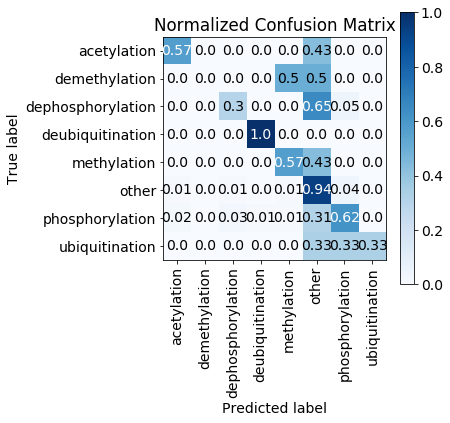

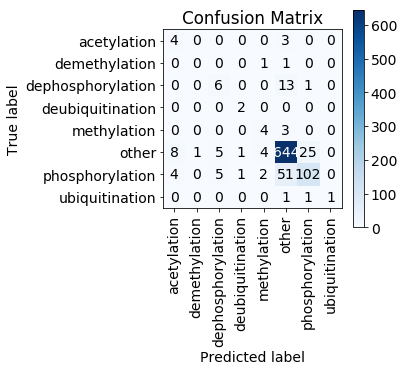

In [23]:
plot_confusion_matrix(df_single_test_results)

In [24]:
def plot_pr_curve(df):
    import matplotlib.pyplot as plt
    import scikitplot as skplt
    keys = list(df["confidence_scores"][0].keys())
    
    skplt.metrics.plot_precision_recall(df_single_test_results["actual"], df_single_test_results[keys], figsize=(5,5)).legend(bbox_to_anchor=(1,1))



In [25]:
def plot_roc_curve(df):
    import matplotlib.pyplot as plt
    import scikitplot as skplt
    keys = list(df["confidence_scores"][0].keys())


    skplt.metrics.plot_roc(df_single_test_results["actual"], df_single_test_results[keys], figsize=(5,5)).legend(bbox_to_anchor=(1,1))





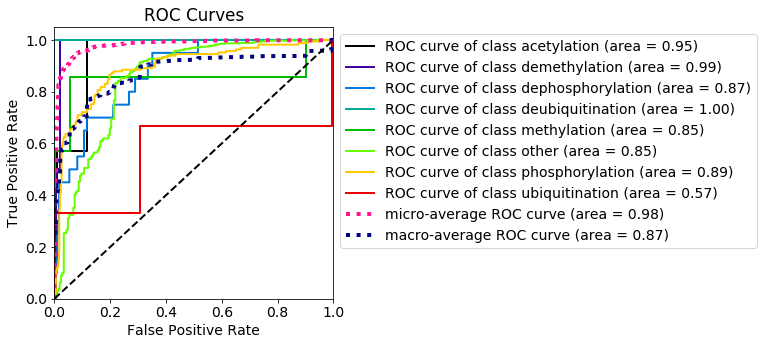

In [26]:
plot_roc_curve(df_single_test_results)

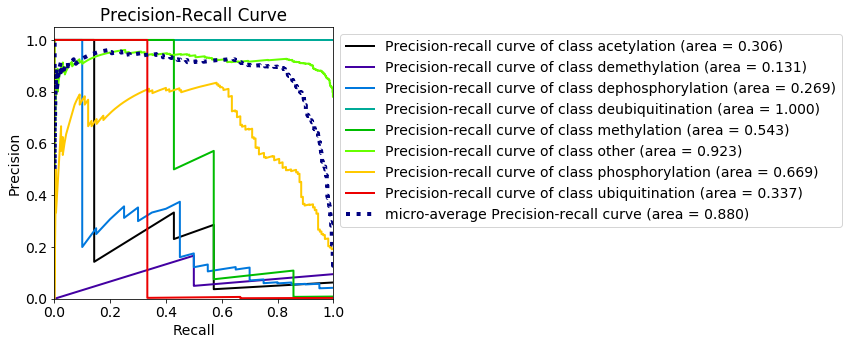

In [27]:
plot_pr_curve(df_single_test_results)


## Training / Validation epoch fit

In [28]:
import json
import pandas as pd
from pandas.io.json import json_normalize

def load_as_df (file):
    with open(file, "r") as i:
        data = json.loads(i.read())
        
    return json_normalize(data)
    

In [29]:
df_train_fit = load_as_df(train_fit_file)
df_train_fit["score"] =df_train_fit["score"]* 100
df_train_fit.sort_values(["score"], ascending=False).head(n=10)

,epoch,loss,score
54,54,3.390856,98.973797
53,53,3.457244,98.966646
64,64,2.967948,98.961337
62,62,3.808389,98.936131
61,61,3.627413,98.901122
63,63,4.979595,98.891725
66,66,3.689085,98.853903
57,57,4.332291,98.838719
51,51,4.309092,98.808714
60,60,4.036671,98.796451


In [30]:
df_val_fit = load_as_df(validation_fit_file)
df_val_fit["score"] =df_val_fit["score"]* 100


df_val_fit.sort_values(["score"], ascending=False).head(n=10)

,epoch,loss,score
46,46,57.225372,49.308367
53,53,53.640128,48.903075
61,61,59.399389,46.647083
36,36,50.904879,45.056540
34,34,47.869467,44.548877
24,24,47.984016,44.398632
37,37,50.479884,43.713973
57,57,59.542782,43.623593
32,32,49.630450,43.546953
66,66,57.197902,43.358709


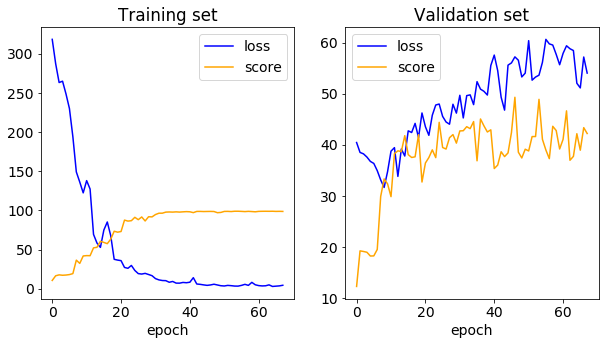

In [31]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

df_train_fit.plot.line(x="epoch", y="loss", ax = ax[0], color ="blue")
df_train_fit.plot.line(x="epoch", y="score", ax = ax[0], color="orange")
ax[0].set_title("Training set")
#ax[0].yaxis.set_major_locator(plt.FixedLocator([0,.1,.2,.3,.4,.5,.6, .7,.8,.9,1]))

df_val_fit.plot.line(x="epoch", y="loss", ax = ax[1], color="blue")
df_val_fit.plot.line(x="epoch", y="score", ax = ax[1], color ="orange")
ax[1].set_title("Validation set")
#ax[1].yaxis.set_major_locator(plt.FixedLocator([0,.1,.2,.3,.4,.5,.6, .7,.8,.9,1]))



plt.show()

## Variation Bert - Objective F-score

In [32]:
import boto3
import re

def search_log(stream_names, filter_pattern, regex_pattern):
    client = boto3.client('logs')

    log_group_name= "/aws/sagemaker/TrainingJobs"

    response = client.filter_log_events(
        logGroupName=log_group_name,
        logStreamNames=stream_names,
        filterPattern= filter_pattern,
        limit=10,
        interleaved=False
    )
    assert len(response["events"]) == 1
    log_message = response["events"][0]["message"]
    
    # extract the cm from string
    prog = re.compile(regex_pattern)
    result = prog.match(log_message)
    
    return result



def get_prf(stream_names, filterPattern):
    regex_pattern = ".*precision, recall, fscore, support\s+\((0\.\d+,\s+0\.\d+,\s+0\.\d+).*"
    
    result = search_log(stream_names, filterPattern, regex_pattern).group(1)

    # normalise string to remove extra space
    result = re.sub("\s+", "", result) 
    
    # split the string, sep by comma..514 62 41 75
    precision, recall, fscore = result.split(",")
    
    return float(precision), float(recall), float(fscore)


    
def get_val_macro_score(stream_names):
    filterPattern =  '"__main__ - INFO - macro average scores"'
    return get_prf(stream_names, filterPattern)

def get_val_micro_score(stream_names):
    filterPattern =  '"__main__ - INFO - micro average scores"'
    return get_prf(stream_names, filterPattern)

def get_log_name(sagemaker_job_name):
    client = boto3.client('logs')
    log_group_name= "/aws/sagemaker/TrainingJobs"
    
    response = client.describe_log_streams(
    logGroupName=log_group_name,
    logStreamNamePrefix=sagemaker_job_name,
    orderBy='LogStreamName',
    descending=False,
    limit=5
)
    assert len(response["logStreams"]) == 1
    
    return  response["logStreams"][0]["logStreamName"]

In [33]:
#precision, recall, fscore
jobs = [
 "ppi-bert-2020-12-13-10-51-25-188"
,"ppi-bert-2020-12-13-10-50-44-295"
,"ppi-bert-2020-12-13-10-50-01-820"
,"ppi-bert-2020-12-13-10-49-16-863"
,"ppi-bert-2020-12-13-10-48-25-273"
,"ppi-bert-2020-12-13-10-47-49-841"
,"ppi-bert-2020-12-13-10-46-54-644"
,"ppi-bert-2020-12-13-10-46-02-428"
,"ppi-bert-2020-12-13-10-45-08-793"
,"ppi-bert-2020-12-13-10-44-07-422"
]

In [34]:
import pandas as pd

val_scores = []
for j in jobs:
    l = get_log_name(j)
    precision, recall, fmacro = get_val_macro_score([l])
    fmicro = get_val_micro_score([l])[2]
    val_scores.append({"jobname": j, "precision":precision*100, "recall": recall*100, "f1-macro": fmacro*100,"f1-micro": fmicro*100})

df_val_variation_scores = pd.DataFrame(val_scores)

In [35]:
df_val_variation_scores .describe()

,f1-macro,f1-micro,precision,recall
count,10.000000,10.000000,10.000000,10.000000
mean,43.496080,78.642857,47.260360,43.509433
std,3.815629,3.295419,5.501584,6.051916
min,37.783595,71.904762,39.162811,35.595936
25%,40.958351,77.678571,44.240615,39.602392
50%,42.644197,78.809524,46.425727,43.074852
75%,46.061098,80.416667,48.968231,44.819592
max,49.138463,83.809524,57.824238,56.787104


In [36]:
best_val_job = df_val_variation_scores.iloc[df_val_variation_scores["f1-macro"].idxmax()]["jobname"]

In [37]:
df_val_variation_scores.head(n=10)

,f1-macro,f1-micro,jobname,precision,recall
0,42.899958,78.809524,ppi-bert-2020-12-13-10-51-25-188,45.496277,44.475053
1,42.388436,80.238095,ppi-bert-2020-12-13-10-50-44-295,44.112838,41.695579
2,41.905043,83.809524,ppi-bert-2020-12-13-10-50-01-820,49.271348,39.157723
3,49.010582,81.190476,ppi-bert-2020-12-13-10-49-16-863,57.824238,44.934439
4,44.877607,80.476190,ppi-bert-2020-12-13-10-48-25-273,47.355177,44.454125
5,40.642786,78.809524,ppi-bert-2020-12-13-10-47-49-841,54.189005,35.595936
6,49.138463,77.380952,ppi-bert-2020-12-13-10-46-54-644,48.058880,56.787104
7,46.455595,75.238095,ppi-bert-2020-12-13-10-46-02-428,44.623945,48.914474
8,37.783595,71.904762,ppi-bert-2020-12-13-10-45-08-793,39.162811,38.143499
9,39.858738,78.571429,ppi-bert-2020-12-13-10-44-07-422,42.509084,40.936398


In [38]:
df_val_variation_scores.iloc[df_val_variation_scores["f1-macro"].idxmax()]

f1-macro                              49.1385
f1-micro                               77.381
jobname      ppi-bert-2020-12-13-10-46-54-644
precision                             48.0589
recall                                56.7871
Name: 6, dtype: object

In [39]:
from sklearn.metrics import classification_report



def download_single_file(bucket_name_path, local_path):
    index = bucket_name_path.find("://")

    # remove the s3:// if present
    if index > -1:
        bucket_name_path = bucket_name_path[index + 3:]

    key_start_index = bucket_name_path.find("/")
    bucket_name = bucket_name_path
    key = "/"
    if key_start_index > -1:
        bucket_name = bucket_name_path[0:key_start_index]
        key = bucket_name_path[key_start_index + 1:]
        
    client = boto3.resource('s3')
    client.Bucket(bucket_name).download_file(key, local_path)


def load_scores_as_df (file):
    with open(file, "r") as i:
        data = json.loads(i.read())
        
    return json_normalize(data)
    
def get_predictions(s3_path):
    tmp_dir = tempfile.mkdtemp()
    outfile = os.path.join(tmp_dir, "output.tar.gz" )
    download_single_file(s3_path, outfile)
    tf = tarfile.open(outfile)
    tf.extractall(path=tmp_dir)
    test_input_file = os.path.join(tmp_dir, "predicted.json")


    df_results =  pd.read_json(test_input_file)
    df_results["actual"] = df_results["class"]
    
    validation_fit_file = glob.glob("{}/validation_scores_epoch_Objectdump*.json".format(tmp_dir))[0]
    train_fit_file = glob.glob("{}/training_scores_epoch_Objectdump*.json".format(tmp_dir))[0]

    df_val_fit = load_scores_as_df(validation_fit_file)
    df_train_fit = load_scores_as_df(train_fit_file)



    return df_results, df_val_fit, df_train_fit



def create_classification_report(actual, pred, labels=None):
    score_report_dict = sklearn.metrics.classification_report(actual, pred, output_dict=True, labels=labels)

    score_report_dict_transformed = []
    
    summary = {}
    for k, v in score_report_dict.items():
        if k in ["accuracy" ]: 
          
            summary[k] = v
        else:

            score_report_dict_transformed.append(
                {
                    "InteractionType" : k,
                    "precision" : v["precision"],
                    "recall" : v["recall"],
                    "f1-score" : v["f1-score"],
                    "support" : v["support"]
                }
            )
        
    return pd.DataFrame(score_report_dict_transformed), summary
    
def get_all_classification_report(list_of_s3_path):
    scores = []

    for s3_path in list_of_s3_path:
        df,_,_ = get_predictions(s3_path) 
        labels = list(set(df["actual"].unique().tolist()) - set(['other']))
        df_classification_summary,_ = create_classification_report(df["actual"], df["predicted"], labels=labels)
        df_classification_summary["keypath"] = s3_path
        

        scores.append(df_classification_summary)
        
    return pd.concat(scores)




def get_all_scores (list_of_s3_path):
    scores = []

    for s3_path in list_of_s3_path:
        df,_,_ = get_predictions(s3_path) 
        score = {}
        score["key"]=s3_path
        score["F1-score"] = 100*f1_score(df["actual"], df["predicted"], average='macro' ,sample_weight=None)  
        score["Precision"]  =100* precision_score(df["actual"], df["predicted"], average='macro' ,sample_weight=None)  
        score["Recall"] = 100*recall_score(df["actual"], df["predicted"], average='macro' ,sample_weight=None) 
        score["Accuracy"] = 100*accuracy_score(df["actual"], df["predicted"])  


        scores.append(score)
        
    return pd.DataFrame(scores)


def get_ensemble (list_of_s3_path):
    scores = {}

    for s3_path in list_of_s3_path:
        df,_,_ = get_predictions(s3_path) 
        scores[s3_path] = df
        
    return scores

In [40]:
%%time

s3_model_paths = []
for k in jobs:
    s3_path = s3_model_path_format.format(k)
    s3_model_paths.append(s3_path)

df_test_variation_scores =  get_all_scores(s3_model_paths)

/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predict

CPU times: user 1.33 s, sys: 442 ms, total: 1.77 s
Wall time: 37.2 s


/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
df_test_variation_scores.describe()

,Accuracy,F1-score,Precision,Recall
count,10.000000,10.000000,10.000000,10.000000
mean,83.064877,40.722402,45.722963,41.489233
std,1.747419,5.895859,9.969051,6.381735
min,79.865772,32.161715,34.246202,31.157552
25%,81.935123,35.968659,36.931069,37.429166
50%,83.668904,40.201414,45.823075,39.752160
75%,84.144295,45.421323,50.537166,45.285259
max,84.899329,49.101747,66.055480,51.023372


In [42]:
df_test_variation_scores.query("key == '{}'".format(s3_model_path_format.format(best_val_job)))

,Accuracy,F1-score,Precision,Recall,key
6,80.760626,37.208217,36.603482,45.719603,s3://aegovan-data/results/ppi-bert-2020-12-13-10-46-54-644/output/output.tar.gz


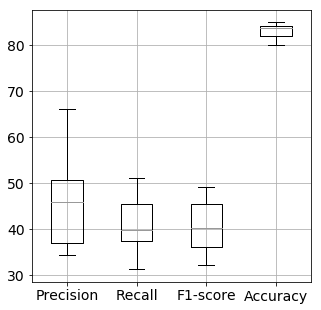

In [43]:

fig, ax = plt.subplots(1,1, figsize=(5, 5))
plt.style.use('grayscale')

df_test_variation_scores[["Precision", "Recall", "F1-score", "Accuracy"]].boxplot(ax=ax )
#ax.set_title( "BERT Variation - PPI typed dataset" )

plt.savefig("score_variation_typed.eps", bbox_inches='tight')





### Ensemble results

In [44]:
%%time

s3_model_paths = []
for k in jobs:
    job_name = k 
    s3_path = s3_model_path_format.format(job_name)
    s3_model_paths.append(s3_path)

ensemble_results =  get_ensemble(s3_model_paths)

CPU times: user 1.03 s, sys: 464 ms, total: 1.5 s
Wall time: 32.7 s


In [45]:
import math
def populate_predicted_confidence(df):
    keys = list(df["confidence_scores"][0].keys())
    # This is log softmax, convert to softmax prob
    for k in keys:
        df[k]  =df["confidence_scores"].apply(lambda x: math.exp(x[k]))
        df[k]  =df["confidence_scores"].apply(lambda x: math.exp(x[k]))

    df["predicted_confidence"] = df.apply(lambda r: max(r[ keys]/ sum(r[ keys])), axis=1 )

In [46]:
vote_base="votes_{}"
def populate_ensemble_predicted_confidence(ensemble_results_dict):
    ensemble_results = list(ensemble_results_dict.values())
    base_df= ensemble_results[0]
    keys = list(base_df["confidence_scores"][0].keys())
    vote_keys = [ vote_base.format(k) for k in keys]
    result = base_df[["actual", "normalised_abstract", "participant1Id", "participant2Id", "num_unique_gene_normalised_id", "num_gene_normalised_id"]  ]
    result["index"] = base_df.index
    for v in vote_keys + keys:
        result[v] = 0.0
    # This is log softmax, convert to softmax prob
    for df in ensemble_results:
        for k in keys:
            populate_predicted_confidence(df)
        
            result[k] += df[k]
            result[vote_base.format(k)] += df.apply(lambda r: 1 if r["predicted"] == k else 0 , axis=1)


            
    
    # populate voting
    result["ensemble_predicted_confidence"] =  result.apply(lambda r: max(r[ keys]/ sum(r[ keys])), axis=1 )
    result["ensemble_predicted"] =  result.apply(lambda r: keys[list(r[ keys]).index(max(r[ keys]))], axis=1  )


    result["ensemble_majority_prediction"] = result.apply(lambda r: keys[list(r[ vote_keys]).index(max(r[ vote_keys]))], axis=1 )
    result["ensemble_confidence_majority_prediction"] = result.apply(lambda r: r[r["ensemble_majority_prediction"]], axis=1 )
    
    return result




In [47]:
def get_best_result(df_dict, best_val_key):
    for k in df_dict:
        if best_val_key in k:
            return k,  df_dict[k]
      

In [48]:
k, best_df = get_best_result(ensemble_results, best_val_job)



In [49]:
best_df.head()

,pubmedId,pubmedabstract,annotations,num_unique_gene_normalised_id,num_gene_normalised_id,normalised_abstract,participant1Id,participant2Id,class,predicted,confidence_scores,actual
0,16407301,"MAPK/ERK kinase kinase 3 (MEKK3) is a mitogen-activated protein kinase kinase kinase (MAP3K) that functions upstream of the MAP kinases and IkappaB kinase. Phosphorylation is believed to be a critical component for MEKK3-dependent signal transduction, but little is known about the phosphorylation sites of this MAP3K. To address this question, point mutations were introduced in the activation loop (T-loop), substituting alanine for serine or threonine, and the mutants were transfected into HEK293 Epstein-Barr virus nuclear antigen cells. MEKK3-dependent activation of an NF-kappaB reporter gene as well as ERK, JNK, and p38 MAP kinases correlated with a requirement for serine at position 526. Constitutively active mutants of MEKK3, consisting of S526D and S526E, were capable of activating a NF-kappaB luciferase reporter gene as well as ERK and MEK, suggesting that a negative charge at Ser526 was necessary for MEKK3 activity and implicating Ser526 as a phosphorylation site. An antibody was developed that specifically recognized phospho-Ser526 of MEKK3 but did not recognize the S526A point mutant. The catalytically inactive (K391M) mutant of MEKK3 was not phosphorylated at Ser526, indicating that phosphorylation of Ser526 occurs via autophosphorylation. Endogenous MEKK3 was phosphorylated on Ser526 in response to osmotic stress. In addition, phosphorylation of Ser526 was required for MKK6 phosphorylation in vitro, whereas dephosphorylation of Ser526 was mediated by protein phosphatase 2A and sensitive to okadaic acid and sodium fluoride. Finally, the association between MEKK3 and 14-3-3 was dependent on Ser526 and prevented dephosphorylation of Ser526. In summary, Ser526 of MEKK3 is an autophosphorylation site within the T-loop that is regulated by PP2A and 14-3-3 proteins.","[{'start': '0', 'end': '24', 'name': 'MAPK/ERK kinase kinase 3', 'type': 'Gene', 'normalised_id': '4215'}, {'start': '26', 'end': '31', 'name': 'MEKK3', 'type': 'Gene', 'normalised_id': '4215'}, {'start': '215', 'end': '220', 'name': 'MEKK3', 'type': 'Gene', 'normalised_id': '4215'}, {'start': '543', 'end': '548', 'name': 'MEKK3', 'type': 'Gene', 'normalised_id': '4215'}, {'start': '625', 'end': '628', 'name': 'p38', 'type': 'Gene', 'normalised_id': '1432'}, {'start': '732', 'end': '737', 'name': 'MEKK3', 'type': 'Gene', 'normalised_id': '4215'}, {'start': '853', 'end': '856', 'name': 'MEK', 'type': 'Gene', 'normalised_id': '5609'}, {'start': '920', 'end': '925', 'name': 'MEKK3', 'type': 'Gene', 'normalised_id': '4215'}, {'start': '1058', 'end': '1063', 'name': 'MEKK3', 'type': 'Gene', 'normalised_id': '4215'}, {'start': '1155', 'end': '1160', 'name': 'MEKK3', 'type': 'Gene', 'normalised_id': '4215'}, {'start': '1280', 'end': '1285', 'name': 'MEKK3', 'type': 'Gene', 'normalised_id': '4215'}, {'start': '1402', 'end': '1406', 'name': 'MKK6', 'type': 'Gene', 'normalised_id': '5608'}, {'start': '1592', 'end': '1597', 'name': 'MEKK3', 'type': 'Gene', 'normalised_id': '4215'}, {'start': '1698', 'end': '1703', 'name': 'MEKK3', 'type': 'Gene', 'normalised_id': '4215'}, {'start': '1774', 'end': '1778', 'name': 'PP2A', 'type': 'Gene', 'normalised_id': '5524'}]",5,15,"Q99759 (Q99759) is a mitogen-activated protein kinase kinase kinase (MAP3K) that functions upstream of the MAP kinases and IkappaB kinase. Phosphorylation is believed to be a critical component for Q99759-dependent signal transduction, but little is known about the phosphorylation sites of this MAP3K. To address this question, point mutations were introduced in the activation loop (T-loop), substituting alanine for serine or threonine, and the mutants were transfected into HEK293 Epstein-Barr virus nuclear antigen cells. Q99759-dependent activation of an NF-kappaB reporter gene as well as ERK, JNK, and Q16539 MAP kina

In [50]:

df_ensemble = populate_ensemble_predicted_confidence(ensemble_results)

/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [51]:
df_ensemble.head(n=3)

,actual,normalised_abstract,participant1Id,participant2Id,num_unique_gene_normalised_id,num_gene_normalised_id,index,votes_acetylation,votes_demethylation,votes_dephosphorylation,votes_deubiquitination,votes_methylation,votes_other,votes_phosphorylation,votes_ubiquitination,acetylation,demethylation,dephosphorylation,deubiquitination,methylation,other,phosphorylation,ubiquitination,ensemble_predicted_confidence,ensemble_predicted,ensemble_majority_prediction,ensemble_confidence_majority_prediction
0,other,"Q99759 (Q99759) is a mitogen-activated protein kinase kinase kinase (MAP3K) that functions upstream of the MAP kinases and IkappaB kinase. Phosphorylation is believed to be a critical component for Q99759-dependent signal transduction, but little is known about the phosphorylation sites of this MAP3K. To address this question, point mutations were introduced in the activation loop (T-loop), substituting alanine for serine or threonine, and the mutants were transfected into HEK293 Epstein-Barr virus nuclear antigen cells. Q99759-dependent activation of an NF-kappaB reporter gene as well as ERK, JNK, and Q16539 MAP kinases correlated with a requirement for serine at position 526. Constitutively active mutants of Q99759, consisting of S526D and S526E, were capable of activating a NF-kappaB luciferase reporter gene as well as ERK and O14733, suggesting that a negative charge at Ser526 was necessary for Q99759 activity and implicating Ser526 as a phosphorylation site. An antibody was developed that specifically recognized phospho-Ser526 of Q99759 but did not recognize the S526A point mutant. The catalytically inactive (K391M) mutant of Q99759 was not phosphorylated at Ser526, indicating that phosphorylation of Ser526 occurs via autophosphorylation. Endogenous Q99759 was phosphorylated on Ser526 in response to osmotic stress. In addition, phosphorylation of Ser526 was required for P52564 phosphorylation in vitro, whereas dephosphorylation of Ser526 was mediated by protein phosphatase 2A and sensitive to okadaic acid and sodium fluoride. Finally, the association between Q99759 and 14-3-3 was dependent on Ser526 and prevented dephosphorylation of Ser526. In summary, Ser526 of Q99759 is an autophosphorylation site within the T-loop that is regulated by Q15257 and 14-3-3 proteins.",P52564,Q99759,5,15,0,0.0,0.0,1.0,0.0,0.0,9.0,0.0,0.0,2.638822,1.391840,49.070528,2.092151,1.752224,1077.742104,38.669992,2.657908,0.916435,other,other,1077.742104
1,other,"Q99759 (Q99759) is a mitogen-activated protein kinase kinase kinase (MAP3K) that functions upstream of the MAP kinases and IkappaB kinase. Phosphorylation is believed to be a critical component for Q99759-dependent signal transduction, but little is known about the phosphorylation sites of this MAP3K. To address this question, point mutations were introduced in the activation loop (T-loop), substituting alanine for serine or threonine, and the mutants were transfected into HEK293 Epstein-Barr virus nuclear antigen cells. Q99759-dependent activation of an NF-kappaB reporter gene as well as ERK, JNK, and Q16539 MAP kinases correlated with a requirement for serine at position 526. Constitutively active mutants of Q99759, consisting of S526D and S526E, were capable of activating a NF-kappaB luciferase reporter gene as well as ERK and O14733, suggesting that a negative charge at Ser526 was necessary for Q99759 activity and implicating Ser526 as a phosphorylation site. An antibody was developed that specifically recognized phospho-Ser526 of Q99759 but did not recognize the S526A point mutant. The catalytically inactive (K391M) mutant of Q99759 was not phosphorylated at Ser526, indicating that phosphorylation of Ser526 occurs via autophosphorylation. Endogenous Q99759 was phosphorylated on Ser526 in response to osmotic stress. In addition, phosphorylation of Ser526 was required for P52564 phosphorylation in vitro, whereas dephosphorylation of Ser526 was mediated by protein phosphatase 2A and sen

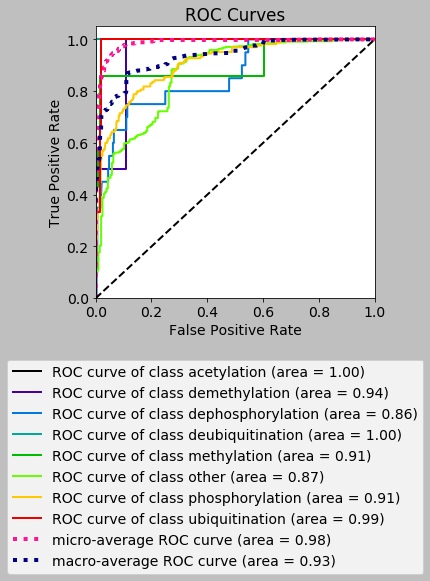

In [52]:

import matplotlib.pyplot as plt
import scikitplot as skplt
keys = list(best_df["confidence_scores"][0].keys())


skplt.metrics.plot_roc(df_ensemble["actual"], df_ensemble[keys], figsize=(5,5)).legend(bbox_to_anchor=(1.2,-0.2))


plt.savefig("plot_roc_ensemble.eps", bbox_inches='tight')


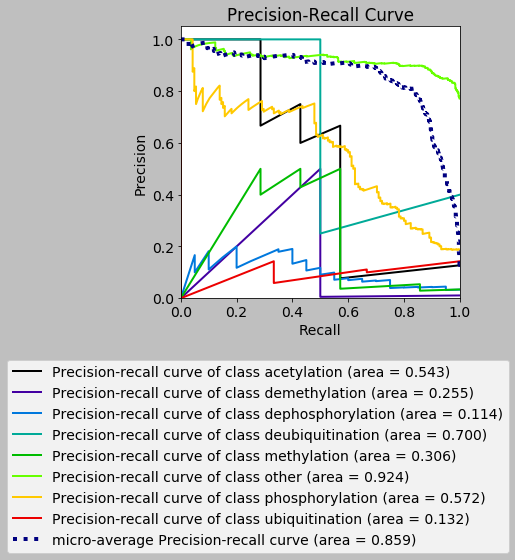

In [53]:

import matplotlib.pyplot as plt
import scikitplot as skplt
keys = list(best_df["confidence_scores"][0].keys())



skplt.metrics.plot_precision_recall(best_df["actual"], best_df[keys], figsize=(5,5)).legend(bbox_to_anchor=(1.2,-0.2))


plt.savefig("plot_pr_bestval_on_test.eps", bbox_inches='tight')



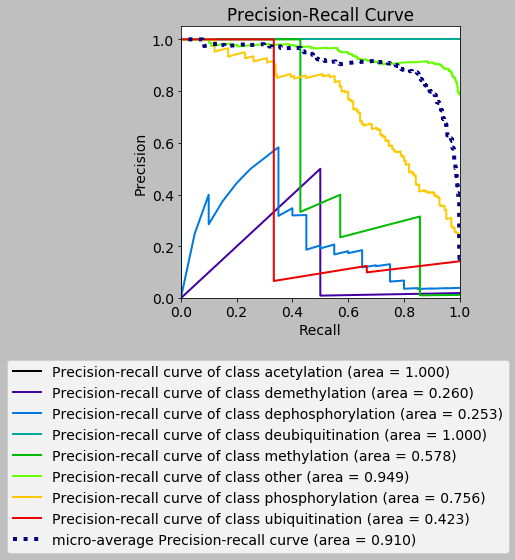

In [54]:

import matplotlib.pyplot as plt
import scikitplot as skplt
keys = list(best_df["confidence_scores"][0].keys())



skplt.metrics.plot_precision_recall(df_ensemble["actual"], df_ensemble[keys], figsize=(5,5)).legend(bbox_to_anchor=(1.2,-0.2))


plt.savefig("plot_pr_ensemble.eps", bbox_inches='tight')



### Get thresholds to use

In [55]:
import sklearn
from sklearn.preprocessing import label_binarize
import numpy as np 

def get_thrsholds(df, field_actual, classes, confidence_colms):
    result = []
    actual_binarized = label_binarize(df[field_actual], classes=classes)
    predicted_binarized = np.true_divide(df[confidence_colms].values, df[confidence_colms].values.sum(axis=1, keepdims=True)) 
    #predicted_binarized[predicted_binarized < 0.5] = 0.0
    for i in range(actual_binarized.shape[1]):
        
        _, _, thres = sklearn.metrics.precision_recall_curve(actual_binarized[:,i],predicted_binarized[:,i])
  
        best_pr = -1
        pr = []
        rc = []
        for ti, t in enumerate(thres):
            p_full = predicted_binarized[:,i]
            a_full = actual_binarized[:,i]
            #a = a_full[p_full >= t]
            p_label = ( (p_full >= t) & (t > 0.5)).astype(int)
            
#             cut_off = 0.5 if t < 0.5 else t
#             p_label = (p>0.5).astype(int)

            pr.append( sklearn.metrics.precision_score(a_full,p_label, average='binary' ,sample_weight=None))
            rc.append(sklearn.metrics.recall_score(a_full,p_label))
            
            if best_pr < pr[-1]:
                idx =  ti
            if best_pr == 1.0:
                break
            

#         print(keys[i])
#         print(np.round(pr,4))
#         print(np.round(thres,4))



        #get first / lowest index of highest precision
        #last element then it is always one.. so not applicable
        # idx = np.argmax(pr[:-1])
       
        result.append( {
            "key" : keys[i],
            "threshold" :  thres[idx-1],
            "precision" : pr[idx],
            "recall" : rc[idx]
        })
    return result




In [56]:
df_ensemble_best_threshold = pd.DataFrame(get_thrsholds(df_ensemble, field_actual = "actual", classes =keys,confidence_colms=keys ))
df_ensemble_best_threshold

/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,key,precision,recall,threshold
0,acetylation,1.0,0.142857,0.682695
1,demethylation,0.0,0.000000,0.046032
2,dephosphorylation,0.0,0.000000,0.578541
3,deubiquitination,1.0,0.500000,0.295456
4,methylation,1.0,0.285714,0.797715
5,other,1.0,0.001453,0.998800
6,phosphorylation,1.0,0.006061,0.994484
7,ubiquitination,0.0,0.000000,0.132735


In [57]:
df_ensemble.query("actual == 'deubiquitination' or ensemble_predicted == 'deubiquitination'")[[ "actual", "ensemble_predicted", "ensemble_predicted_confidence"]].sort_values(by = ["ensemble_predicted_confidence"])

,actual,ensemble_predicted,ensemble_predicted_confidence
776,deubiquitination,other,0.350528
727,deubiquitination,deubiquitination,0.578975


### Get Scores

In [58]:
df_ensemble.shape

(894, 27)

In [59]:
from sklearn.metrics import f1_score, accuracy_score,precision_score, recall_score

scores = {}
scores["F1_macro"] = f1_score(df_ensemble["actual"], df_ensemble["ensemble_predicted"], average='macro' ,sample_weight=None)  
scores["precision_macro"]  = precision_score(df_ensemble["actual"], df_ensemble["ensemble_predicted"], average='macro' ,sample_weight=None)  
scores["recall_macro"] = recall_score(df_ensemble["actual"], df_ensemble["ensemble_predicted"], average='macro' ,sample_weight=None)  
scores["F1_micro"]  = f1_score(df_ensemble["actual"], df_ensemble["ensemble_predicted"], average='micro' ,sample_weight=None)  





scores["accuracy"] = accuracy_score(df_ensemble["actual"], df_ensemble["ensemble_predicted"],sample_weight=None)
print(scores)



{'F1_macro': 0.4395132042347624, 'precision_macro': 0.6219076774903687, 'recall_macro': 0.36556868519077823, 'F1_micro': 0.8557046979865772, 'accuracy': 0.8557046979865772}


/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


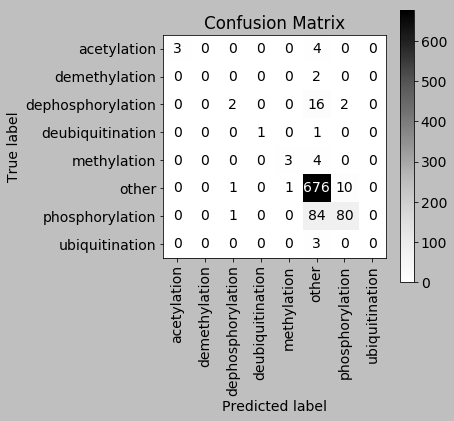

In [60]:
import matplotlib.pyplot as plt
import scikitplot as skplt

fig,ax = plt.subplots(1, 1, figsize=(5,5))


# skplt.metrics.plot_confusion_matrix(df_ensemble["actual"], df_ensemble["ensemble_predicted"], normalize=True , ax=ax[0],  x_tick_rotation=90)
# plt.savefig("confusionmatrix_normalised.png", bbox_inches='tight')

skplt.metrics.plot_confusion_matrix(df_ensemble["actual"], df_ensemble["ensemble_predicted"], ax=ax, normalize=False, x_tick_rotation=90, cmap="Greys" )
plt.savefig("confusionmatrix_unnormalised.eps", bbox_inches='tight')



In [61]:
from sklearn.metrics import confusion_matrix
labels = df_ensemble["actual"].unique()
confusion_df = pd.DataFrame(data= confusion_matrix(df_ensemble["actual"], df_ensemble["ensemble_predicted"], labels=labels), index=labels, columns=labels)

confusion_df.to_csv("confusion.matrix.csv")


In [62]:
print(confusion_df.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  other &  phosphorylation &  dephosphorylation &  methylation &  acetylation &  deubiquitination &  ubiquitination &  demethylation \\
\midrule
other             &    676 &               10 &                  1 &            1 &            0 &                 0 &               0 &              0 \\
phosphorylation   &     84 &               80 &                  1 &            0 &            0 &                 0 &               0 &              0 \\
dephosphorylation &     16 &                2 &                  2 &            0 &            0 &                 0 &               0 &              0 \\
methylation       &      4 &                0 &                  0 &            3 &            0 &                 0 &               0 &              0 \\
acetylation       &      4 &                0 &                  0 &            0 &            3 &                 0 &               0 &              0 \\
deubiquitination  &      1 &            

In [63]:
pos_labels = list(set(df_ensemble["actual"].unique().tolist()) - set(['other']))
df_ensemble_classwise_report, summary_ensemble = create_classification_report(df_ensemble["actual"], df_ensemble["ensemble_predicted"], labels=pos_labels)
df_ensemble_classwise_report

/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,InteractionType,f1-score,precision,recall,support
0,acetylation,0.600000,1.000000,0.428571,7
1,deubiquitination,0.666667,1.000000,0.500000,2
2,demethylation,0.000000,0.000000,0.000000,2
3,dephosphorylation,0.166667,0.500000,0.100000,20
4,phosphorylation,0.622568,0.869565,0.484848,165
5,methylation,0.545455,0.750000,0.428571,7
6,ubiquitination,0.000000,0.000000,0.000000,3
7,micro avg,0.574194,0.855769,0.432039,206
8,macro avg,0.371622,0.588509,0.277427,206
9,weighted avg,0.560236,0.814215,0.432039,206


In [64]:
pos_labels = list(set(best_df["actual"].unique().tolist()) - set(['other']))
best_df_classwise_report, summary_ensemble = create_classification_report(best_df["actual"], best_df["predicted"], labels=pos_labels)
best_df_classwise_report

,InteractionType,f1-score,precision,recall,support
0,acetylation,0.571429,0.571429,0.571429,7
1,deubiquitination,0.400000,0.250000,1.000000,2
2,demethylation,0.000000,0.000000,0.000000,2
3,dephosphorylation,0.166667,0.142857,0.200000,20
4,phosphorylation,0.500000,0.746988,0.375758,165
5,methylation,0.444444,0.363636,0.571429,7
6,ubiquitination,0.000000,0.000000,0.000000,3
7,micro avg,0.443149,0.554745,0.368932,206
8,macro avg,0.297506,0.296416,0.388374,206
9,weighted avg,0.455070,0.646386,0.368932,206


In [65]:
print(df_ensemble_classwise_report.merge( best_df_classwise_report,suffixes= ('.e', '.s'), on="InteractionType" ).drop("support.e", axis=1).to_latex(index=False, float_format =lambda x: "{:.2%}".format(x)).replace("\\%",""))

\begin{tabular}{lrrrrrrr}
\toprule
   InteractionType &  f1-score.e &  precision.e &  recall.e &  f1-score.s &  precision.s &  recall.s &  support.s \\
\midrule
       acetylation &      60.00 &      100.00 &    42.86 &      57.14 &       57.14 &    57.14 &          7 \\
  deubiquitination &      66.67 &      100.00 &    50.00 &      40.00 &       25.00 &   100.00 &          2 \\
     demethylation &       0.00 &        0.00 &     0.00 &       0.00 &        0.00 &     0.00 &          2 \\
 dephosphorylation &      16.67 &       50.00 &    10.00 &      16.67 &       14.29 &    20.00 &         20 \\
   phosphorylation &      62.26 &       86.96 &    48.48 &      50.00 &       74.70 &    37.58 &        165 \\
       methylation &      54.55 &       75.00 &    42.86 &      44.44 &       36.36 &    57.14 &          7 \\
    ubiquitination &       0.00 &        0.00 &     0.00 &       0.00 &        0.00 &     0.00 &          3 \\
         micro avg &      57.42 &       85.58 &    43.20 &    

In [66]:
pos_labels = ['acetylation','phosphorylation', 'methylation', 'dephosphorylation']
df_ensemble_sample_size_classwise_report, _ = create_classification_report(df_ensemble["actual"], df_ensemble["ensemble_predicted"], labels=pos_labels)
best_df_sample_size_classwise_report,_= create_classification_report(best_df["actual"], best_df["predicted"], labels=pos_labels) 

df_ensemble_sample_size_classwise_report



,InteractionType,f1-score,precision,recall,support
0,acetylation,0.600000,1.000000,0.428571,7
1,phosphorylation,0.622568,0.869565,0.484848,165
2,methylation,0.545455,0.750000,0.428571,7
3,dephosphorylation,0.166667,0.500000,0.100000,20
4,micro avg,0.582781,0.854369,0.442211,199
5,macro avg,0.483672,0.779891,0.360498,199
6,weighted avg,0.573242,0.832805,0.442211,199


In [67]:
print(df_ensemble_sample_size_classwise_report.merge(best_df_sample_size_classwise_report, on="InteractionType", suffixes=[".e", ",b"]).drop("support.e", axis=1).to_latex(index=False, float_format =lambda x: "{:.2%}".format(x)).replace("\\%",""))

\begin{tabular}{lrrrrrrr}
\toprule
   InteractionType &  f1-score.e &  precision.e &  recall.e &  f1-score,b &  precision,b &  recall,b &  support,b \\
\midrule
       acetylation &      60.00 &      100.00 &    42.86 &      57.14 &       57.14 &    57.14 &          7 \\
   phosphorylation &      62.26 &       86.96 &    48.48 &      50.00 &       74.70 &    37.58 &        165 \\
       methylation &      54.55 &       75.00 &    42.86 &      44.44 &       36.36 &    57.14 &          7 \\
 dephosphorylation &      16.67 &       50.00 &    10.00 &      16.67 &       14.29 &    20.00 &         20 \\
         micro avg &      58.28 &       85.44 &    44.22 &      45.12 &       57.36 &    37.19 &        199 \\
         macro avg &      48.37 &       77.99 &    36.05 &      42.06 &       45.62 &    42.97 &        199 \\
      weighted avg &      57.32 &       83.28 &    44.22 &      46.71 &       66.66 &    37.19 &        199 \\
\bottomrule
\end{tabular}



In [68]:
df_ensemble["particpant1Exists"] = df_ensemble.apply(lambda r: r["participant1Id"] in r["normalised_abstract"]   , 1)
df_ensemble["particpant2Exists"] = df_ensemble.apply(lambda r: r["participant2Id"] in r["normalised_abstract"]   , 1)
df_ensemble["particpantsExists"] = df_ensemble.apply(lambda r: r["particpant2Exists"] and r["particpant1Exists"]   , 1)




In [69]:
df_ensemble.query("actual != ensemble_predicted  and  particpantsExists"  )[["ensemble_predicted", "actual","normalised_abstract", "participant1Id", "participant2Id"]].sample(n=10)

,ensemble_predicted,actual,normalised_abstract,participant1Id,participant2Id
739,other,phosphorylation,"Q12959, the human homologue of the Drosophila Discs-large (Q12959) tumor suppressor protein, is known to interact with the tumor suppressor protein APC and the human papillomavirus E6 transforming protein. In a two-hybrid screen, we identified a 322-aa serine/threonine kinase that binds to the PDZ2 domain of Q12959. The mRNA for this Q96KB5, or Q96KB5, is most abundant in placenta and absent from adult brain tissue. The protein sequence of Q96KB5 has all the characteristic protein kinase subdomains and a C-terminal PDZ-binding T/SXV motif. In vitro, Q96KB5 binds specifically to PDZ2 of Q12959 through its C-terminal T/SXV motif. Q96KB5 and Q12959 are phosphorylated at mitosis in HeLa cells, and the mitotic phosphorylation of Q96KB5 is required for its kinase activity. In vitro, P06493/cyclin B phosphorylates Q96KB5. This evidence shows how Q96KB5 could link Q12959 or other PDZ-containing proteins to signal transduction pathways regulating the cell cycle or cellular proliferation.",Q96KB5,P06493
711,other,phosphorylation,"Understanding and controlling the mechanism by which stem cells balance self-renewal versus differentiation is of great importance for stem cell therapeutics. Q60793 promotes the self-renewal of embryonic stem cells, but the precise mechanism regulating this role of Q60793 is unclear. We found that P27361 or P28482 binds the activation domain of Q60793 and directly phosphorylates Q60793 at Ser123. This phosphorylation suppresses Q60793 activity, inducing embryonic stem cell differentiation. Conversely, inhibition of Q60793 phosphorylation enhances Q60793 activity and suppresses embryonic stem cell differentiation. Notably, phosphorylation of Q60793 by ERKs causes recruitment and binding of the F-box proteins TrCP1 or TrCP2 (components of an ubiquitin E3 ligase) to the Q60793 N-terminal domain, which results in Q60793 ubiquitination and degradation. Overall, our data provide a molecular basis for the role of P27361 and P28482 in regulating Q60793-mediated mouse embryonic stem cell self-renewal.",Q60793,P27361
863,other,phosphorylation,"Human O60674 tyrosine kinase mediates signaling through numerous cytokine receptors. The O60674 28481 domain functions as a negative regulator and is presumed to be a catalytically inactive pseudokinase, but the mechanism(s) for its inhibition of O60674 remains unknown. Mutations in 28481 lead to increased O60674 activity, contributing to myeloproliferative neoplasms (MPNs). Here we show that 28481 is a dual-specificity protein kinase that phosphorylates two negative regulatory sites in O60674: Ser523 and Tyr570. Inactivation of 28481 catalytic activity increased O60674 basal activity and downstream signaling. Notably, different MPN mutations abrogated 28481 activity in cells, and in MPN (V617F) patient cells phosphorylation of Tyr570 was reduced, suggesting that loss of 28481 activity contributes to the pathogenesis of MPNs. These results identify the catalytic activity of 28481 as a previously unrecognized mechanism to control basal activity and signaling of O60674.",O60674,O60674
695,other,phosphorylation,"Expression and activity of the germinal center kinase, Q9H2G2 (Q9H2G2), are increased during kidney development and recovery from ischemic acute renal failure. In this study, we characterize the activation and functional role of Q9H2G2. Q9H2G2 underwent dimerization via the C-terminal domain, and dimerization enhanced Q9H2G2 activity. In contrast, the C-terminal domain of Q9H2G2 did not dimerize with a related kinase, P26927, and did not affect P26927 activity. Phosphorylation/dephosphorylation of Q9H2G2 were not associated with changes in kinase activity. Q9H2G2 induced phosphorylation of Q99683 (Q99683) and increased Q99683 activity, indicating that Q99683 is a substrate of Q9H2G2. Moreover, Q9H2G2 stimulated phosphorylation of P28482 mitogen-activated protein kinase via 

In [70]:
df_ensemble.query("not particpantsExists").shape , df_ensemble.query("not particpantsExists and actual != ensemble_predicted").shape, df_ensemble.shape

((96, 30), (22, 30), (894, 30))

In [71]:
from sklearn.metrics import f1_score, accuracy_score,precision_score, recall_score

scores = {}
scores["F1_macro"] = f1_score(df_ensemble["actual"], df_ensemble["ensemble_majority_prediction"], average='macro' ,sample_weight=None)  
scores["precision_macro"]  = precision_score(df_ensemble["actual"], df_ensemble["ensemble_majority_prediction"], average='macro' ,sample_weight=None)  
scores["recall_macro"] = recall_score(df_ensemble["actual"], df_ensemble["ensemble_majority_prediction"], average='macro' ,sample_weight=None)  
scores["F1_micro"]  = f1_score(df_ensemble["actual"], df_ensemble["ensemble_majority_prediction"], average='micro' ,sample_weight=None)  





scores["accuracy"] = accuracy_score(df_ensemble["actual"], df_ensemble["ensemble_majority_prediction"],sample_weight=None)
print(scores)



{'F1_macro': 0.4999054471657211, 'precision_macro': 0.5636801022811386, 'recall_macro': 0.4763446340481224, 'F1_micro': 0.854586129753915, 'accuracy': 0.854586129753915}


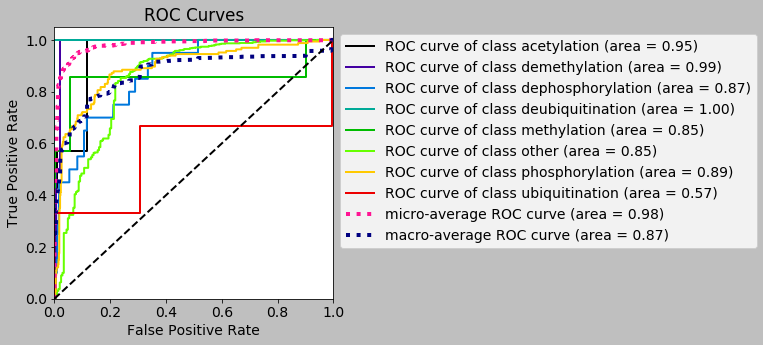

In [72]:
plot_roc_curve(df_single_test_results)

In [73]:
df_ensemble.head(n=2)

,actual,normalised_abstract,participant1Id,participant2Id,num_unique_gene_normalised_id,num_gene_normalised_id,index,votes_acetylation,votes_demethylation,votes_dephosphorylation,votes_deubiquitination,votes_methylation,votes_other,votes_phosphorylation,votes_ubiquitination,acetylation,demethylation,dephosphorylation,deubiquitination,methylation,other,phosphorylation,ubiquitination,ensemble_predicted_confidence,ensemble_predicted,ensemble_majority_prediction,ensemble_confidence_majority_prediction,particpant1Exists,particpant2Exists,particpantsExists
0,other,"Q99759 (Q99759) is a mitogen-activated protein kinase kinase kinase (MAP3K) that functions upstream of the MAP kinases and IkappaB kinase. Phosphorylation is believed to be a critical component for Q99759-dependent signal transduction, but little is known about the phosphorylation sites of this MAP3K. To address this question, point mutations were introduced in the activation loop (T-loop), substituting alanine for serine or threonine, and the mutants were transfected into HEK293 Epstein-Barr virus nuclear antigen cells. Q99759-dependent activation of an NF-kappaB reporter gene as well as ERK, JNK, and Q16539 MAP kinases correlated with a requirement for serine at position 526. Constitutively active mutants of Q99759, consisting of S526D and S526E, were capable of activating a NF-kappaB luciferase reporter gene as well as ERK and O14733, suggesting that a negative charge at Ser526 was necessary for Q99759 activity and implicating Ser526 as a phosphorylation site. An antibody was developed that specifically recognized phospho-Ser526 of Q99759 but did not recognize the S526A point mutant. The catalytically inactive (K391M) mutant of Q99759 was not phosphorylated at Ser526, indicating that phosphorylation of Ser526 occurs via autophosphorylation. Endogenous Q99759 was phosphorylated on Ser526 in response to osmotic stress. In addition, phosphorylation of Ser526 was required for P52564 phosphorylation in vitro, whereas dephosphorylation of Ser526 was mediated by protein phosphatase 2A and sensitive to okadaic acid and sodium fluoride. Finally, the association between Q99759 and 14-3-3 was dependent on Ser526 and prevented dephosphorylation of Ser526. In summary, Ser526 of Q99759 is an autophosphorylation site within the T-loop that is regulated by Q15257 and 14-3-3 proteins.",P52564,Q99759,5,15,0,0.0,0.0,1.0,0.0,0.0,9.0,0.0,0.0,2.638822,1.391840,49.070528,2.092151,1.752224,1077.742104,38.669992,2.657908,0.916435,other,other,1077.742104,True,True,True
1,other,"Q99759 (Q99759) is a mitogen-activated protein kinase kinase kinase (MAP3K) that functions upstream of the MAP kinases and IkappaB kinase. Phosphorylation is believed to be a critical component for Q99759-dependent signal transduction, but little is known about the phosphorylation sites of this MAP3K. To address this question, point mutations were introduced in the activation loop (T-loop), substituting alanine for serine or threonine, and the mutants were transfected into HEK293 Epstein-Barr virus nuclear antigen cells. Q99759-dependent activation of an NF-kappaB reporter gene as well as ERK, JNK, and Q16539 MAP kinases correlated with a requirement for serine at position 526. Constitutively active mutants of Q99759, consisting of S526D and S526E, were capable of activating a NF-kappaB luciferase reporter gene as well as ERK and O14733, suggesting that a negative charge at Ser526 was necessary for Q99759 activity and implicating Ser526 as a phosphorylation site. An antibody was developed that specifically recognized phospho-Ser526 of Q99759 but did not recognize the S526A point mutant. The catalytically inactive (K391M) mutant of Q99759 was not phosphorylated at Ser526, indicating that phosphorylation of Ser526 occurs via autophosphorylation. Endogenous Q99759 was phosphorylated on Ser526 in response to osmotic stress. In addition, phosphorylation of Ser526 was required for P52564 phosphorylation in vitro, whereas depho

In [74]:
from sklearn.metrics import f1_score, accuracy_score,precision_score, recall_score

def probability_threshold(df, confidence_field, predicted_field):
    result = []
    l, u = min(df[confidence_field]), max(df[confidence_field])
    threshold = 0
    step = round( (u-0)/50, 2)
    majority_class = df.groupby(["actual"]).size().idxmax()
    max_valuecounts =  df.groupby(["actual"]).size().max()
    while threshold <= u :
        df_filter = df.query("{} >=  {}".format(confidence_field, threshold))
        max_valuecounts_filter = df_filter.query("actual == '{}'".format(majority_class)).shape[0]


        result.append ({
            "baseline_accuracy" : max_valuecounts/df.shape[0],
            "baseline_accuracy_threshold" : max_valuecounts_filter/df_filter.shape[0],
            "threshold" : threshold,
            "records" : df_filter.shape[0],
            "percentage_records_retained" : df_filter.shape[0]/df.shape[0],
            "normalised_threshold" : (threshold -0 )/(u-0),
            "F1_macro": f1_score(df_filter["actual"], df_filter[predicted_field], average='macro' ,sample_weight=None)  ,
            "precision_macro":precision_score(df_filter["actual"], df_filter[predicted_field], average='macro' ,sample_weight=None) , 
            "recall_macro": recall_score(df_filter["actual"], df_filter[predicted_field], average='macro' ,sample_weight=None) , 
            "F1_micro":    f1_score(df_filter["actual"], df_filter[predicted_field], average='micro' ,sample_weight=None) ,
            "accuracy":accuracy_score(df_filter["actual"], df_filter[predicted_field],sample_weight=None)
        })
        threshold += step
        
    return pd.DataFrame(result)



In [75]:
pt_ensemble_majority_prediction = probability_threshold(df_ensemble,"ensemble_confidence_majority_prediction", "ensemble_majority_prediction")
pt_ensemble_prediction = probability_threshold(df_ensemble,"ensemble_predicted_confidence", "ensemble_predicted")
pt_best_prediction = probability_threshold(best_df,"predicted_confidence", "predicted")

/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


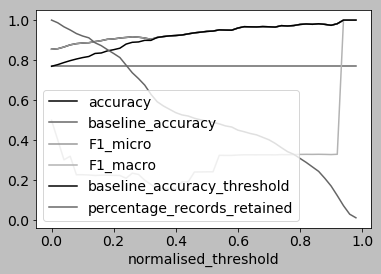

In [76]:
pt_ensemble_majority_prediction  [["normalised_threshold","accuracy", "baseline_accuracy" ,"F1_micro", "F1_macro","baseline_accuracy_threshold", "percentage_records_retained" ]].plot(x="normalised_threshold")

In [77]:
pt_ensemble_majority_prediction.sort_values(by=["normalised_threshold"], ascending=False).head(n=10)

,F1_macro,F1_micro,accuracy,baseline_accuracy,baseline_accuracy_threshold,normalised_threshold,percentage_records_retained,precision_macro,recall_macro,records,threshold
49,1.000000,1.000000,1.000000,0.769575,1.000000,0.980005,0.013423,1.000000,1.000000,12,17528.28
48,1.000000,1.000000,1.000000,0.769575,1.000000,0.960005,0.031320,1.000000,1.000000,28,17170.56
47,1.000000,1.000000,1.000000,0.769575,1.000000,0.940005,0.073826,1.000000,1.000000,66,16812.84
46,0.330303,0.981982,0.981982,0.769575,0.981982,0.920005,0.124161,0.327327,0.333333,111,16455.12
45,0.328947,0.974026,0.974026,0.769575,0.974026,0.900005,0.172260,0.324675,0.333333,154,16097.40
44,0.329749,0.978723,0.978723,0.769575,0.978723,0.880005,0.210291,0.326241,0.333333,188,15739.68
43,0.330261,0.981735,0.981735,0.769575,0.981735,0.860005,0.244966,0.327245,0.333333,219,15381.96
42,0.329810,0.979079,0.979079,0.769575,0.979079,0.840004,0.267338,0.326360,0.333333,239,15024.24
41,0.330084,0.980695,0.980695,0.769575,0.980695,0.820004,0.289709,0.326898,0.333333,259,14666.52
40,0.329684,0.978339,0.978339,0.769575,0.978339,0.800004,0.309843,0.326113,0.333333,277,14308.80


In [78]:
df_ensemble.query("ensemble_confidence_majority_prediction > 12095")["actual"].value_counts()

other                362
phosphorylation        8
dephosphorylation      5
Name: actual, dtype: int64

In [79]:
df_ensemble.to_json("test_ensemble.json")

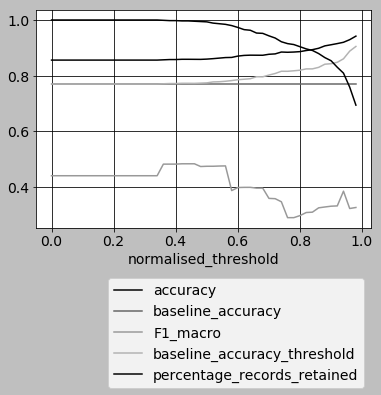

In [80]:
pt_ensemble_prediction   [["normalised_threshold","accuracy", "baseline_accuracy" , "F1_macro","baseline_accuracy_threshold", "percentage_records_retained" ]].plot(x="normalised_threshold", grid=True).legend(bbox_to_anchor=(1, -0.2))
plt.savefig("pb_threhold_ensmebl.png", bbox_inches='tight')

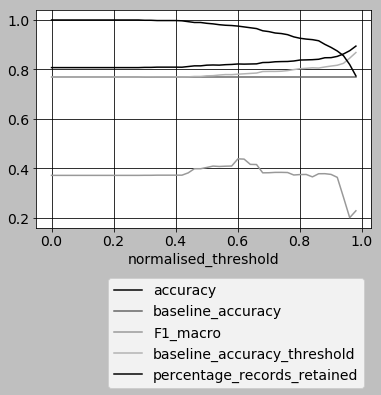

In [81]:
pt_best_prediction  [["normalised_threshold","accuracy", "baseline_accuracy" , "F1_macro","baseline_accuracy_threshold", "percentage_records_retained" ]].plot(x="normalised_threshold", grid=True).legend(bbox_to_anchor=(1, -0.2))
plt.savefig("pb_threhold_best.png", bbox_inches='tight')

In [82]:
pt_ensemble_prediction.sort_values(by=["threshold"], ascending=True).head(n=10)

,F1_macro,F1_micro,accuracy,baseline_accuracy,baseline_accuracy_threshold,normalised_threshold,percentage_records_retained,precision_macro,recall_macro,records,threshold
0,0.439513,0.855705,0.855705,0.769575,0.769575,0.000000,1.0,0.621908,0.365569,894,0.00
1,0.439513,0.855705,0.855705,0.769575,0.769575,0.020024,1.0,0.621908,0.365569,894,0.02
2,0.439513,0.855705,0.855705,0.769575,0.769575,0.040047,1.0,0.621908,0.365569,894,0.04
3,0.439513,0.855705,0.855705,0.769575,0.769575,0.060071,1.0,0.621908,0.365569,894,0.06
4,0.439513,0.855705,0.855705,0.769575,0.769575,0.080095,1.0,0.621908,0.365569,894,0.08
5,0.439513,0.855705,0.855705,0.769575,0.769575,0.100118,1.0,0.621908,0.365569,894,0.10
6,0.439513,0.855705,0.855705,0.769575,0.769575,0.120142,1.0,0.621908,0.365569,894,0.12
7,0.439513,0.855705,0.855705,0.769575,0.769575,0.140166,1.0,0.621908,0.365569,894,0.14
8,0.439513,0.855705,0.855705,0.769575,0.769575,0.160189,1.0,0.621908,0.365569,894,0.16
9,0.439513,0.855705,0.855705,0.769575,0.769575,0.180213,1.0,0.621908,0.365569,894,0.18


In [83]:
pt_best_prediction.sort_values(by=["normalised_threshold"], ascending=True).head(n=10)

,F1_macro,F1_micro,accuracy,baseline_accuracy,baseline_accuracy_threshold,normalised_threshold,percentage_records_retained,precision_macro,recall_macro,records,threshold
0,0.372082,0.807606,0.807606,0.769575,0.769575,0.000000,1.0,0.366035,0.457196,894,0.00
1,0.372082,0.807606,0.807606,0.769575,0.769575,0.020030,1.0,0.366035,0.457196,894,0.02
2,0.372082,0.807606,0.807606,0.769575,0.769575,0.040059,1.0,0.366035,0.457196,894,0.04
3,0.372082,0.807606,0.807606,0.769575,0.769575,0.060089,1.0,0.366035,0.457196,894,0.06
4,0.372082,0.807606,0.807606,0.769575,0.769575,0.080119,1.0,0.366035,0.457196,894,0.08
5,0.372082,0.807606,0.807606,0.769575,0.769575,0.100148,1.0,0.366035,0.457196,894,0.10
6,0.372082,0.807606,0.807606,0.769575,0.769575,0.120178,1.0,0.366035,0.457196,894,0.12
7,0.372082,0.807606,0.807606,0.769575,0.769575,0.140208,1.0,0.366035,0.457196,894,0.14
8,0.372082,0.807606,0.807606,0.769575,0.769575,0.160237,1.0,0.366035,0.457196,894,0.16
9,0.372082,0.807606,0.807606,0.769575,0.769575,0.180267,1.0,0.366035,0.457196,894,0.18


In [84]:
k

's3://aegovan-data/results/ppi-bert-2020-12-13-10-46-54-644/output/output.tar.gz'

In [85]:
pt_ensemble_majority_prediction.sort_values(by=["normalised_threshold"], ascending=True).head(n=10)

,F1_macro,F1_micro,accuracy,baseline_accuracy,baseline_accuracy_threshold,normalised_threshold,percentage_records_retained,precision_macro,recall_macro,records,threshold
0,0.499905,0.854586,0.854586,0.769575,0.769575,0.000000,1.000000,0.563680,0.476345,894,0.00
1,0.401771,0.857143,0.857143,0.769575,0.777778,0.020000,0.986577,0.496552,0.368887,882,357.72
2,0.302812,0.865741,0.865741,0.769575,0.788194,0.040000,0.966443,0.387150,0.268492,864,715.44
3,0.320592,0.876471,0.876471,0.769575,0.797647,0.060000,0.950783,0.389637,0.286836,850,1073.16
4,0.228302,0.882494,0.882494,0.769575,0.805755,0.080000,0.932886,0.247586,0.218665,834,1430.88
5,0.228214,0.885784,0.885784,0.769575,0.812880,0.100001,0.920582,0.248186,0.218217,823,1788.60
6,0.226985,0.887117,0.887117,0.769575,0.818405,0.120001,0.911633,0.247411,0.216777,815,2146.32
7,0.224579,0.892812,0.892812,0.769575,0.833544,0.140001,0.887025,0.249634,0.212757,793,2504.04
8,0.225821,0.897436,0.897436,0.769575,0.835897,0.160001,0.872483,0.256746,0.212316,780,2861.76
9,0.225984,0.904199,0.904199,0.769575,0.846457,0.180001,0.852349,0.260842,0.211235,762,3219.48


## Gene mentions impact

In [86]:
print(df_ensemble.query("actual != 'other'")["num_unique_gene_normalised_id"].describe(percentiles= [ f/100 for f in range(0,110, 10)]).to_latex(float_format = lambda x:  '{:.2f}'.format(x)))

\begin{tabular}{lr}
\toprule
{} &  num\_unique\_gene\_normalised\_id \\
\midrule
count &                         206.00 \\
mean  &                           4.08 \\
std   &                           2.09 \\
min   &                           1.00 \\
0\%    &                           1.00 \\
10\%   &                           2.00 \\
20\%   &                           2.00 \\
30\%   &                           3.00 \\
40\%   &                           3.00 \\
50\%   &                           4.00 \\
60\%   &                           4.00 \\
70\%   &                           5.00 \\
80\%   &                           6.00 \\
90\%   &                           7.00 \\
100\%  &                          11.00 \\
max   &                          11.00 \\
\bottomrule
\end{tabular}



In [87]:
df_ensemble.query("actual != 'other'")\
.groupby(["actual"])["num_unique_gene_normalised_id"]\
.describe(percentiles= [ f/100 for f in range(0,110, 10)])

,count,mean,std,min,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%,max
actual,,,,,,,,,,,,,,,,
acetylation,7.0,4.142857,1.772811,2.0,2.0,2.6,3.0,3.0,3.0,3.0,4.8,6.0,6.0,6.0,6.0,6.0
demethylation,2.0,5.000000,0.000000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
dephosphorylation,20.0,4.400000,1.818038,1.0,1.0,2.0,3.0,3.0,4.0,4.5,5.0,5.3,6.0,6.1,8.0,8.0
deubiquitination,2.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
methylation,7.0,3.857143,1.214986,2.0,2.0,2.6,3.0,3.0,3.4,4.0,4.6,5.0,5.0,5.0,5.0,5.0
phosphorylation,165.0,4.030303,2.207040,1.0,1.0,1.4,2.0,3.0,3.0,3.0,4.0,5.0,6.0,7.0,11.0,11.0
ubiquitination,3.0,4.666667,1.154701,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.4,4.8,5.2,5.6,6.0,6.0


In [88]:
print(df_ensemble.query("actual != 'other'")\
.groupby(["actual"])["num_unique_gene_normalised_id"]\
.describe()\
.to_latex(float_format = lambda x:  '{:.2f}'.format(x)))

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  count &  mean &  std &  min &  25\% &  50\% &  75\% &   max \\
actual            &        &       &      &      &      &      &      &       \\
\midrule
acetylation       &   7.00 &  4.14 & 1.77 & 2.00 & 3.00 & 3.00 & 6.00 &  6.00 \\
demethylation     &   2.00 &  5.00 & 0.00 & 5.00 & 5.00 & 5.00 & 5.00 &  5.00 \\
dephosphorylation &  20.00 &  4.40 & 1.82 & 1.00 & 3.00 & 4.50 & 6.00 &  8.00 \\
deubiquitination  &   2.00 &  4.00 & 0.00 & 4.00 & 4.00 & 4.00 & 4.00 &  4.00 \\
methylation       &   7.00 &  3.86 & 1.21 & 2.00 & 3.00 & 4.00 & 5.00 &  5.00 \\
phosphorylation   & 165.00 &  4.03 & 2.21 & 1.00 & 3.00 & 3.00 & 6.00 & 11.00 \\
ubiquitination    &   3.00 &  4.67 & 1.15 & 4.00 & 4.00 & 4.00 & 5.00 &  6.00 \\
\bottomrule
\end{tabular}



In [90]:
from datetime import datetime
def summarize_impact_unique_gene_count(df):
    
    size_genes = df ["num_unique_gene_normalised_id"] .unique().tolist()
    
    pos_labels = list(set(df["actual"].unique().tolist()) - set(['other']))

    frames =[]
    for i in  size_genes:
        print(datetime.now(),"Running for size ", i)
        
        df_size = df.query("num_unique_gene_normalised_id == {}".format(i))

        df_class_wise_report,_ = create_classification_report(df_size["actual"], df_size["ensemble_predicted"], labels=pos_labels)
        
        df_class_wise_report["unique_gene_count"] = i
        
        frames.append(df_class_wise_report)
        
    df = pd.concat(frames)
    
    return df


In [91]:
df_size_summary = summarize_impact_unique_gene_count(df_ensemble)

2020-12-14 18:43:23.187136 Running for size  5
2020-12-14 18:43:23.247123 Running for size  4
2020-12-14 18:43:23.279775 Running for size  6
2020-12-14 18:43:23.316626 Running for size  7
2020-12-14 18:43:23.338294 Running for size  8
2020-12-14 18:43:23.345382 Running for size  3
2020-12-14 18:43:23.353201 Running for size  11
2020-12-14 18:43:23.364030 Running for size  2
2020-12-14 18:43:23.370536 Running for size  10
2020-12-14 18:43:23.380643 Running for size  9
2020-12-14 18:43:23.388411 Running for size  1


/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [92]:
df_size_summary

,InteractionType,f1-score,precision,recall,support,unique_gene_count
0,acetylation,0.000000,0.000000,0.000000,0,5
1,deubiquitination,0.000000,0.000000,0.000000,0,5
2,demethylation,0.000000,0.000000,0.000000,2,5
3,dephosphorylation,0.400000,1.000000,0.250000,4,5
4,phosphorylation,0.200000,0.400000,0.133333,15,5
5,methylation,0.666667,0.666667,0.666667,3,5
6,ubiquitination,0.000000,0.000000,0.000000,0,5
7,micro avg,0.303030,0.555556,0.208333,24,5
8,macro avg,0.180952,0.295238,0.150000,24,5
9,weighted avg,0.275000,0.500000,0.208333,24,5


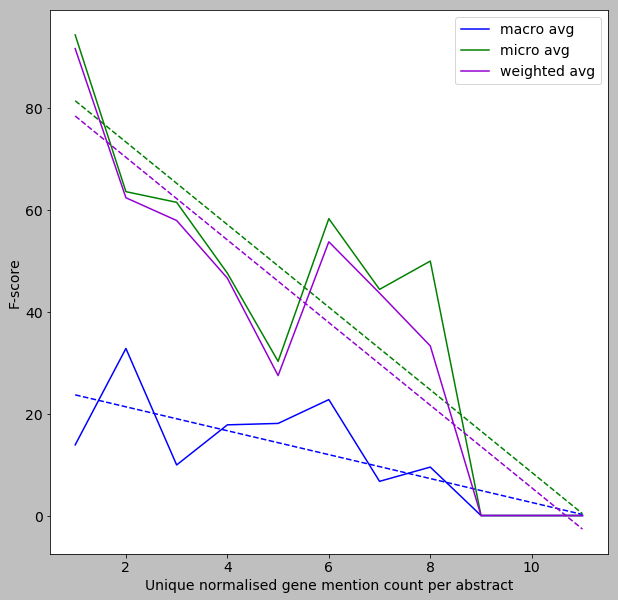

In [93]:
import numpy

fig, ax = plt.subplots(figsize=(10,10))


colors = ['blue', 'green',  "darkviolet"]

for c, (label, df_e) in zip(colors, df_size_summary.query("InteractionType in ['micro avg', 'macro avg', 'weighted avg']").groupby('InteractionType')):
    d = df_e.sort_values(by="unique_gene_count")
    d["f1-score"] = d['f1-score'].apply( lambda x: float( '{:.2%}'.format(x).replace("%", "")) )
    d.plot.line( ax=ax, label=label, x="unique_gene_count" , y="f1-score", color=c  )
    z = numpy.polyfit(d["unique_gene_count"], d["f1-score"], 1)
    p = numpy.poly1d(z)
    plt.plot(  d["unique_gene_count"], p(d["unique_gene_count"]), color=c ,  linestyle='dashed' )
    plt.xlabel("Unique normalised gene mention count per abstract")
    plt.ylabel("F-score")
    
plt.legend()

plt.savefig("GeneCountVsScore.pdf")


plt.show()



## Ensemble size impact

In [94]:
from datetime import datetime
def summarize_impact_ensemble_size(jobs):
    """
    Summarize impact of ensemble_size on prediction
    """
    s3_model_paths = []
    for k in jobs:
        job_name = k 
        s3_path = s3_model_path_format.format(job_name)
        s3_model_paths.append(s3_path)
    
    
    frames = []
    scores = []
    
    for i in range(1, len(s3_model_paths)):
        print(datetime.now(),"Running for ensemble ", i)
        # Compute individual scores
        df_score = get_all_classification_report(s3_model_paths[:i])
        df_score["ensemble_size"] = i
        scores.append(df_score)
        
        #Compute ensemble scores
        ensemble_results =  get_ensemble(s3_model_paths[:i])
        df_ensemble = populate_ensemble_predicted_confidence(ensemble_results)
        
        pos_labels = list(set(df_ensemble["actual"].unique().tolist()) - set(['other']))


        df_class_wise_report,_ = create_classification_report(df_ensemble["actual"], df_ensemble["ensemble_predicted"], labels=pos_labels)
        
        df_class_wise_report["ensemble_size"] = i
        
        frames.append(df_class_wise_report)
        
    df = pd.concat(frames)
    df_scores =  pd.concat(scores)
    
    return df, df_scores
        
        

In [95]:
%%time

df_ensemble_size_compare, df_ensemble_scores = summarize_impact_ensemble_size(jobs)

2020-12-14 18:43:24.197789 Running for ensemble  1


/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remo

2020-12-14 18:43:49.227085 Running for ensemble  2


/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWi

2020-12-14 18:44:34.977078 Running for ensemble  3


/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

2020-12-14 18:45:30.164708 Running for ensemble  4


/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

2020-12-14 18:46:55.387022 Running for ensemble  5


/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

2020-12-14 18:48:30.691415 Running for ensemble  6


/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

2020-12-14 18:50:18.876972 Running for ensemble  7


/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

2020-12-14 18:52:35.416317 Running for ensemble  8


/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

2020-12-14 18:55:23.059189 Running for ensemble  9


/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aeg/miniconda/envs/kegg_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

CPU times: user 9min 1s, sys: 17.2 s, total: 9min 18s
Wall time: 14min 54s


In [96]:
df_ensemble_scores.query("ensemble_size==3").sort_values(by=["keypath", "InteractionType"]).groupby(["InteractionType"])["f1-score","precision","recall"].describe()

f1-score                                                    \
                     count      mean       std       min       25%       50%   
InteractionType                                                                
acetylation            3.0  0.471678  0.027794  0.444444  0.457516  0.470588   
demethylation          3.0  0.000000  0.000000  0.000000  0.000000  0.000000   
dephosphorylation      3.0  0.186638  0.208563  0.000000  0.074074  0.148148   
deubiquitination       3.0  0.822222  0.167774  0.666667  0.733333  0.800000   
macro avg              3.0  0.386596  0.040539  0.353302  0.364024  0.374746   
methylation            3.0  0.523810  0.041239  0.500000  0.500000  0.500000   
micro avg              3.0  0.574699  0.033835  0.537037  0.560782  0.584527   
phosphorylation        3.0  0.627751  0.035680  0.586873  0.615311  0.643750   
ubiquitination         3.0  0.074074  0.128300  0.000000  0.000000  0.000000   
weighted avg           3.0  0.563819  0.035711  0.527331  0.546380  0.565429   

                                      precision                                \
                        75%       max     count      mean       std       min   
InteractionType                                                                 
acetylation        0.485294  0.500000       3.0  0.614815  0.334320  0.400000   
demethylation      0.000000  0.000000       3.0  0.000000  0.000000  0.000000   
dephosphorylation  0.279956  0.411765       3.0  0.261905  0.250849  0.000000   
deubiquitination   0.900000  1.000000       3.0  0.888889  0.192450  0.666667   
macro avg          0.403243  0.431740       3.0  0.444162  0.047664  0.396429   
methylation        0.535714  0.571429       3.0  0.538624  0.082804  0.444444   
micro avg          0.593529  0.602532       3.0  0.693401  0.056517  0.629630   
phosphorylation    0.648191  0.652632       3.0  0.749342  0.075348  0.664516   
ubiquitination     0.111111  0.222222       3.0  0.055556  0.096225  0.000000   
weighted avg       0.582063  0.598698       3.0  0.674263  0.041274  0.638784   

                                                          recall            \
                        25%       50%       75%       max  count      mean   
InteractionType                                                              
acetylation        0.422222  0.444444  0.722222  1.000000    3.0  0.476190   
demethylation      0.000000  0.000000  0.000000  0.000000    3.0  0.000000   
dephosphorylation  0.142857  0.285714  0.392857  0.500000    3.0  0.150000   
deubiquitination   0.833333  1.000000  1.000000  1.000000    3.0  0.833333   
macro avg          0.420364  0.444300  0.468028  0.491756    3.0  0.377706   
methylation        0.507937  0.571429  0.585714  0.600000    3.0  0.523810   
micro avg          0.671458  0.713287  0.725287  0.737288    3.0  0.498382   
phosphorylation    0.719758  0.775000  0.791755  0.808511    3.0  0.549495   
ubiquitination     0.000000  0.000000  0.083333  0.166667    3.0  0.111111   
weighted avg       0.651613  0.664442  0.692002  0.719561    3.0  0.498382   

                                                                               
                        std       min       25%       50%       75%       max  
InteractionType                                                                
acetylation        0.164957  0.285714  0.428571  0.571429  0.571429  0.571429  
demethylation      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
dephosphorylation  0.180278  0.000000  0.050000  0.100000  0.225000  0.350000  
deubiquitination   0.288675  0.500000  0.750000  1.000000  1.000000  1.000000  
macro avg          0.069376  0.314780  0.340507  0.366234  0.409168  0.452103  
methylation        0.082479  0.428571  0.500000  0.571429  0.571429  0.571429  
micro avg          0.077720  0.422330  0.458738  0.495146  0.536408  0.577670  
phosphorylation    0.082730  0.460606  0.512121  0.563636  0.593939  0.624242  
ubiquitination     0.192450 

In [100]:
 df_ensemble_size_compare.head()

,InteractionType,f1-score,precision,recall,support,ensemble_size
0,acetylation,0.444444,1.000000,0.285714,7,1
1,deubiquitination,0.800000,0.666667,1.000000,2,1
2,demethylation,0.000000,0.000000,0.000000,2,1
3,dephosphorylation,0.411765,0.500000,0.350000,20,1
4,phosphorylation,0.643750,0.664516,0.624242,165,1


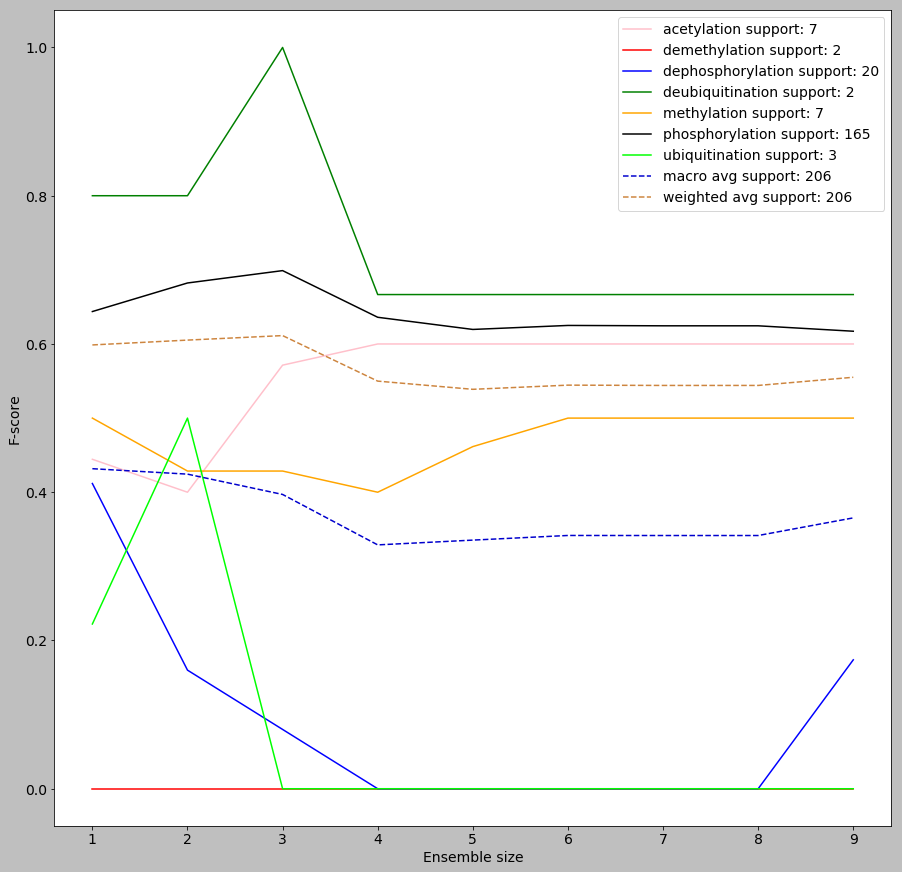

In [101]:
fig, ax = plt.subplots(figsize=(15,15))
colors = ["pink", "red", "blue", "green", "orange", "black", "lime"]
line_type = []


for  c, (label, df_e) in zip(colors, df_ensemble_size_compare.query("InteractionType not in [ 'macro avg', 'weighted avg', 'micro avg']").sort_values(by="support").groupby('InteractionType')):
    support = df_e["support"].iloc[0]
    df_e.sort_values(by=["ensemble_size"]).plot.line( ax=ax, label= "{} support: {}".format(label , str(support)), x="ensemble_size" , y="f1-score", color=c)

plt.legend()

colors = ["mediumblue", "peru"]
for  c, (label, df_e) in zip(colors,df_ensemble_size_compare.query("InteractionType  in [ 'macro avg', 'weighted avg']").groupby('InteractionType')):
    support = df_e["support"].iloc[0]
    df_e.sort_values(by=["ensemble_size"]).plot.line( ax=ax, label= "{} support: {}".format(label , str(support)), x="ensemble_size" , y="f1-score", color=c, linestyle="dashed")
plt.legend()

plt.ylabel("F-score")
plt.xlabel("Ensemble size") 

plt.savefig("EnsembleSizeImpact.pdf")


plt.show()